Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

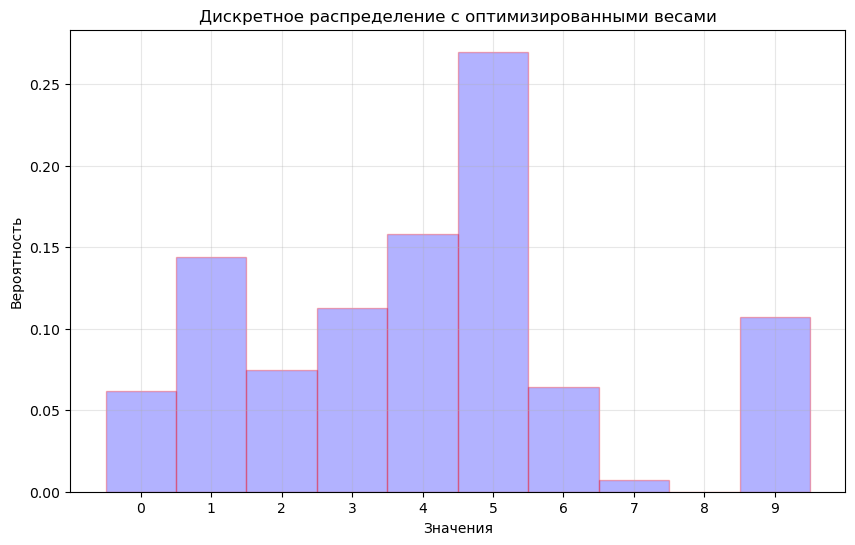

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
from matplotlib.patches import Ellipse, Circle, Polygon

prob_masses = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
outcomes = np.arange(10)

order = np.argsort(prob_masses)[::-1]
ordered_probs = prob_masses[order]
ordered_outcomes = outcomes[order]

cumulative_dist = np.cumsum(ordered_probs / np.sum(ordered_probs))

def sample_discrete_distribution(n=1000):
    uniform_samples = np.random.random(n)
    indices = np.searchsorted(cumulative_dist, uniform_samples)
    return ordered_outcomes[indices]

discrete_samples = sample_discrete_distribution(1000)

plt.figure(figsize=(10, 6))
plt.hist(discrete_samples, bins=np.arange(11)-0.5, density=True, 
         alpha=0.3, color='blue', edgecolor='red')
plt.xticks(range(10))
plt.xlabel('Значения')
plt.ylabel('Вероятность')
plt.title('Дискретное распределение с оптимизированными весами')
plt.grid(alpha=0.3)
plt.show()

Смоделируйте выборку размера 1000 из распределения Exp(λ) с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

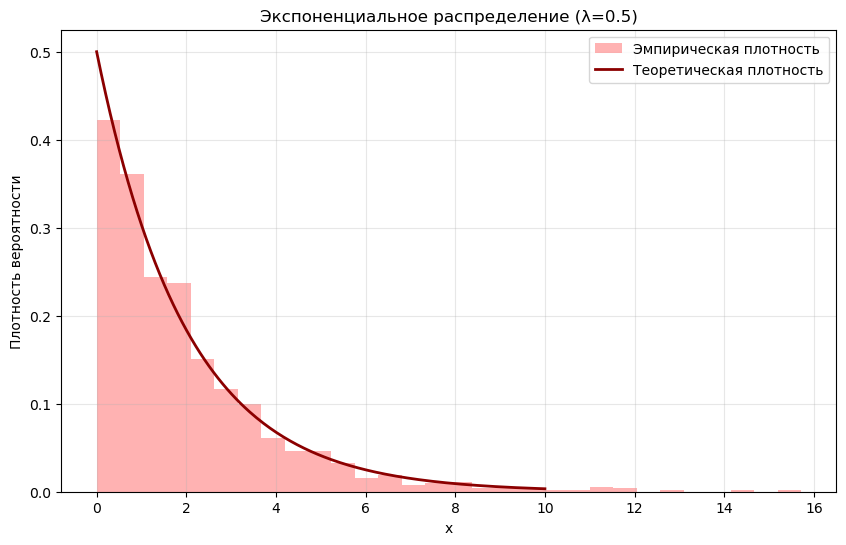

In [21]:
def generate_exponential_samples(rate, n=1000):
    uniform_vals = np.random.random(n)
    return -np.log(1 - uniform_vals) / rate

exp_rate = 0.5
exp_samples = generate_exponential_samples(exp_rate, 1000)

x_range = np.linspace(0, 10, 200)
true_density = exp_rate * np.exp(-exp_rate * x_range)

plt.figure(figsize=(10, 6))
plt.hist(exp_samples, bins=30, density=True, alpha=0.3, 
         color='red', label='Эмпирическая плотность')
plt.plot(x_range, true_density, 'darkred', linewidth=2, 
         label='Теоретическая плотность')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.title('Экспоненциальное распределение (λ=0.5)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

Эффективность метода: 0.4158


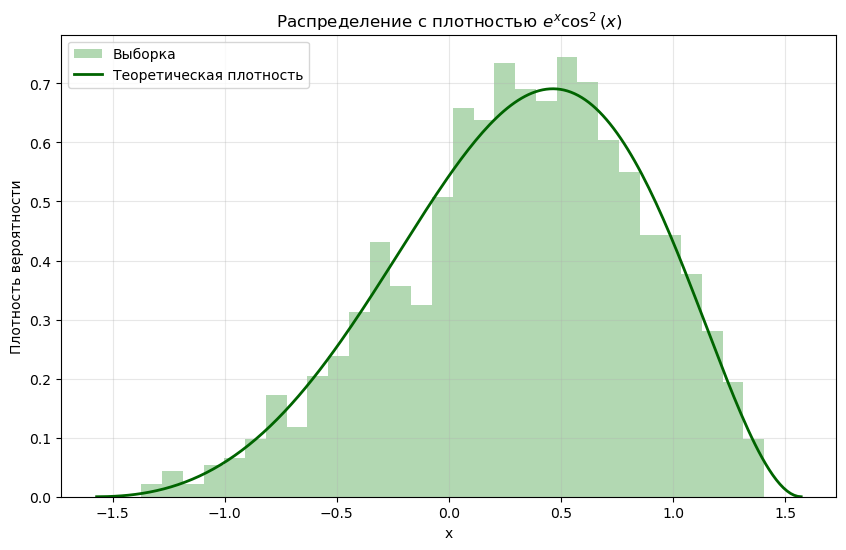

In [23]:
def density_function(x):
    return np.exp(x) * (np.cos(x))**2

x_domain = np.linspace(-np.pi/2, np.pi/2, 500)
max_val = np.max(density_function(x_domain))
M = max_val * 1.1

def rejection_sampling(n_points=1000):
    accepted = []
    total_trials = 0
    
    while len(accepted) < n_points:
        total_trials += 1
        x_proposal = np.random.uniform(-np.pi/2, np.pi/2)
        y_threshold = np.random.uniform(0, M)
        
        if y_threshold <= density_function(x_proposal):
            accepted.append(x_proposal)
    
    efficiency = n_points / total_trials
    print(f"Эффективность метода: {efficiency:.4f}")
    return np.array(accepted)

rejection_samples = rejection_sampling(1000)

area, _ = integrate.quad(density_function, -np.pi/2, np.pi/2)
def normalized_density(x):
    return density_function(x) / area

x_values = np.linspace(-np.pi/2, np.pi/2, 200)
normalized_pdf = normalized_density(x_values)

plt.figure(figsize=(10, 6))
plt.hist(rejection_samples, bins=30, density=True, alpha=0.3, 
         color='green', label='Выборка')
plt.plot(x_values, normalized_pdf, 'darkgreen', linewidth=2, 
         label='Теоретическая плотность')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.title('Распределение с плотностью $e^x\\cos^2(x)$')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

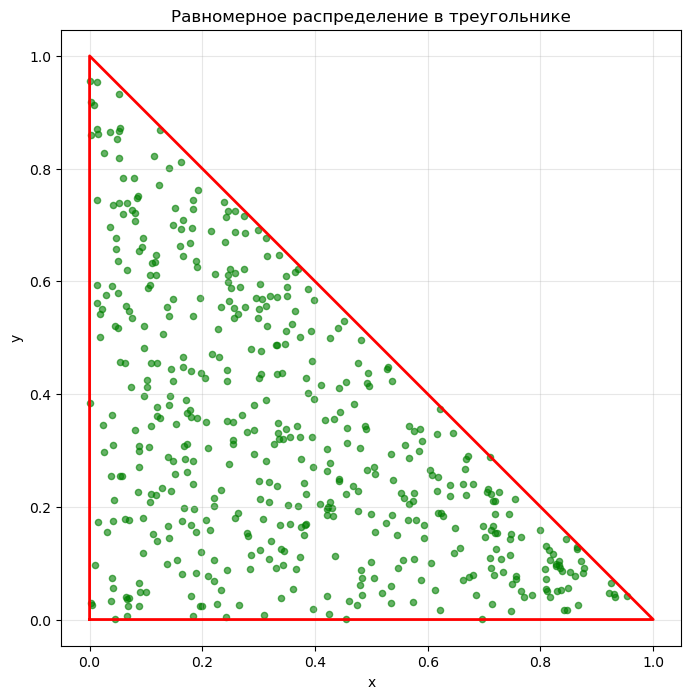

In [5]:
def sample_triangle_uniform(n_points=500):
    u = np.random.random(n_points)
    v = np.random.random(n_points)
    
    inside_triangle = u + v <= 1
    u_inside = u[inside_triangle]
    v_inside = v[inside_triangle]
    
    while len(u_inside) < n_points:
        u_new = np.random.random(n_points)
        v_new = np.random.random(n_points)
        mask = u_new + v_new <= 1
        u_inside = np.concatenate([u_inside, u_new[mask]])
        v_inside = np.concatenate([v_inside, v_new[mask]])
    
    return u_inside[:n_points], v_inside[:n_points]

v1 = np.array([0, 0])
v2 = np.array([1, 0]) 
v3 = np.array([0, 1])

u_coords, v_coords = sample_triangle_uniform(500)
triangle_points = (v1 + u_coords[:, np.newaxis] * (v2 - v1) + 
                  v_coords[:, np.newaxis] * (v3 - v1))

plt.figure(figsize=(8, 8))
plt.plot([v1[0], v2[0], v3[0], v1[0]], 
         [v1[1], v2[1], v3[1], v1[1]], 'r-', linewidth=2)
plt.scatter(triangle_points[:, 0], triangle_points[:, 1], 
           alpha=0.6, s=20, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Равномерное распределение в треугольнике')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

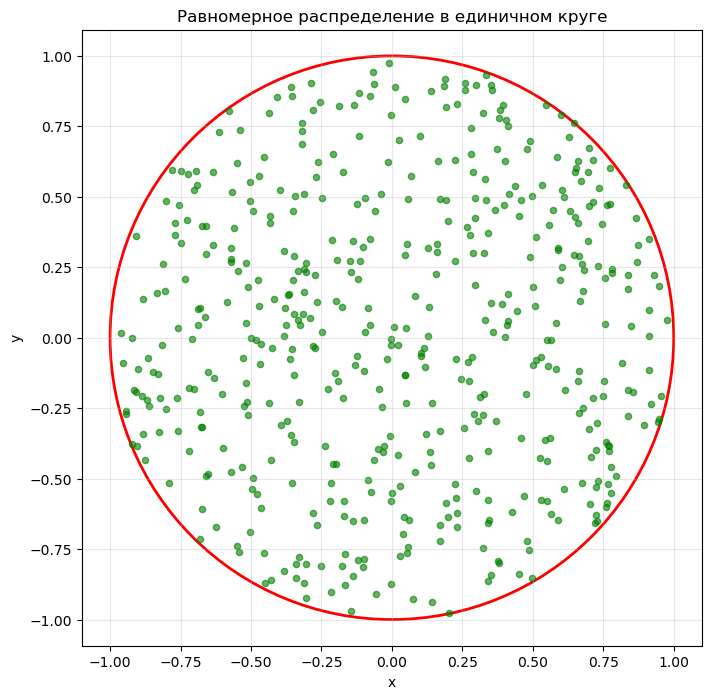

Среднее расстояние от центра: 0.670


In [4]:
def sample_circle_uniform(n_points=500):
    radii = np.sqrt(np.random.uniform(0, 1, n_points))
    angles = np.random.uniform(0, 2*np.pi, n_points)
    
    x_coords = radii * np.cos(angles)
    y_coords = radii * np.sin(angles)
    
    return x_coords, y_coords

circle_x, circle_y = sample_circle_uniform(500)

plt.figure(figsize=(8, 8))
unit_circle = Circle((0, 0), 1, fill=False, color='red', linewidth=2)
plt.gca().add_patch(unit_circle)
plt.scatter(circle_x, circle_y, alpha=0.6, s=20, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Равномерное распределение в единичном круге')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

distance_from_center = np.sqrt(circle_x**2 + circle_y**2)
print(f"Среднее расстояние от центра: {np.mean(distance_from_center):.3f}")

Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

Точное среднее: [4 7]
Выборочное среднее: [3.98690731 6.97365035]
Точная ковариационная матрица:
[[20 -4]
 [-4 40]]
Выборочная ковариационная матрица:
[[19.60946752 -4.20309068]
 [-4.20309068 38.25005773]]


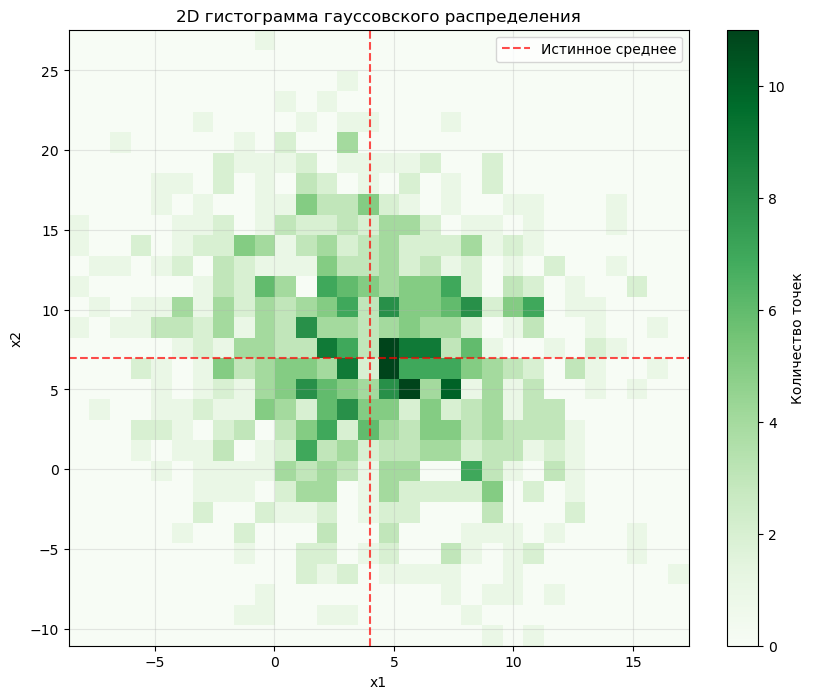

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller_modified(n_samples=1000):
    standard_normals = []
    
    while len(standard_normals) < n_samples:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1*u1 + u2*u2
        
        if 0 < s < 1:
            multiplier = np.sqrt(-2 * np.log(s) / s)
            z1 = u1 * multiplier
            z2 = u2 * multiplier
            standard_normals.append([z1, z2])
    
    return np.array(standard_normals)[:n_samples]

mean_vector = np.array([4, 7])
covariance_matrix = np.array([[20, -4], [-4, 40]])

standard_normal_samples = box_muller_modified(1000)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
A = eigenvectors @ np.diag(np.sqrt(eigenvalues))
multivariate_normal_samples = mean_vector + standard_normal_samples @ A.T

empirical_mean = np.mean(multivariate_normal_samples, axis=0)
empirical_cov = np.cov(multivariate_normal_samples.T)

print(f"Точное среднее: {mean_vector}")
print(f"Выборочное среднее: {empirical_mean}")
print(f"Точная ковариационная матрица:\n{covariance_matrix}")
print(f"Выборочная ковариационная матрица:\n{empirical_cov}")

plt.figure(figsize=(10, 8))
plt.hist2d(multivariate_normal_samples[:, 0], 
           multivariate_normal_samples[:, 1], bins=30, cmap='Greens')
plt.colorbar(label='Количество точек')
plt.axvline(mean_vector[0], color='red', linestyle='--', alpha=0.7, label='Истинное среднее')
plt.axhline(mean_vector[1], color='red', linestyle='--', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D гистограмма гауссовского распределения')
plt.legend()
plt.grid(alpha=0.3)
plt.show()